In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from tabulate import tabulate as tab

In [2]:
import session_info
session_info.show()

# Problem 2: Demand Estimation

The sales of two companies, Company 1 and Company 2, in two regions,
Region 1 and Region 2, are provided here. The description of the only three columns
are:

    ● Sales_U → Sales in equivalent units (lbs)
    ● Sales_USD → Sales in $
    ● date → starting date for the week


● Construct time-series plots of sales and prices for Company 1 in Region 1 and 2. Repeat the exercise for Company 2. Describe the differences or similarities between Company 1 and 2 pricing policies.

In [3]:
# loading the data to a pandas dataframe
r1_c1 = pd.read_csv("region1_company1.csv")
r2_c1 = pd.read_csv("region2_company1.csv")
r1_c2 = pd.read_csv("region1_company2.csv")
r2_c2 = pd.read_csv("region2_company2.csv")

In [4]:
# checking that the data is free of missing values
r1_c1.info()
print("\n")
print(r2_c1.info())
print("\n")
print(r1_c2.info())
print("\n")
print(r2_c2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sales_U    104 non-null    int64 
 1   Sales_USD  104 non-null    int64 
 2   Date       104 non-null    object
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sales_U    104 non-null    int64 
 1   Sales_USD  104 non-null    int64 
 2   Date       104 non-null    object
dtypes: int64(2), object(1)
memory usage: 2.6+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sales_U    104 non-null    int64 
 1   Sales_USD  104 non-null    int64 
 2   Date       104 non-null    o

In [5]:
# adding a column with the price of the product
r1_c1["Price_USD"] = r1_c1["Sales_USD"]/r1_c1["Sales_U"]
r2_c1["Price_USD"] = r2_c1["Sales_USD"]/r2_c1["Sales_U"]
r1_c2["Price_USD"] = r1_c2["Sales_USD"]/r1_c2["Sales_U"]
r2_c2["Price_USD"] = r2_c2["Sales_USD"]/r2_c2["Sales_U"]

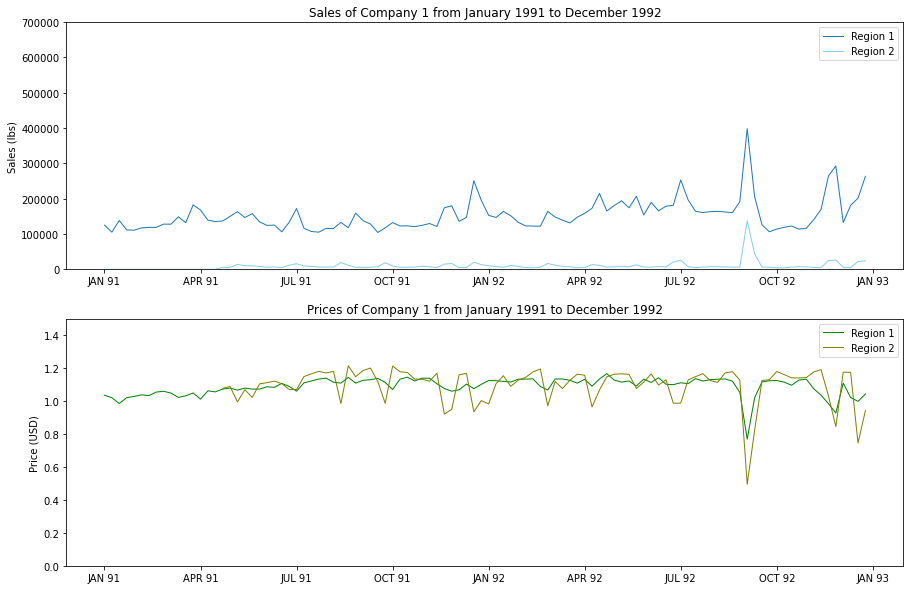

In [6]:
#time series plots with the sales and prices of Company 1

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(15,10))


ax1.plot(r1_c1["Sales_U"],label="Region 1",linewidth=1)
ax1.plot(r2_c1["Sales_U"],label="Region 2", linewidth=1,color = 'skyblue')
ax1.set_xticks(ticks=[0,13,26,39,52,65,78,91,104],labels =["JAN 91","APR 91", "JUL 91","OCT 91","JAN 92","APR 92", "JUL 92","OCT 92","JAN 93"])

ax1.set_ylabel("Sales (lbs)")
ax1.set_title("Sales of Company 1 from January 1991 to December 1992")
ax1.legend(loc="upper right")
ax1.set_ylim(0,700000)

ax2.plot(r1_c1["Price_USD"],label="Region 1" , color ='green',linewidth=1)
ax2.plot(r2_c1["Price_USD"],label="Region 2",linewidth=1 , color ='olive')

ax2.set_xticks(ticks=[0,13,26,39,52,65,78,91,104],labels =["JAN 91","APR 91", "JUL 91","OCT 91","JAN 92","APR 92", "JUL 92","OCT 92","JAN 93"])

ax2.set_ylabel("Price (USD)")
ax2.set_title("Prices of Company 1 from January 1991 to December 1992")
ax2.legend(loc="upper right")
ax2.set_ylim(0,1.5)

plt.show()

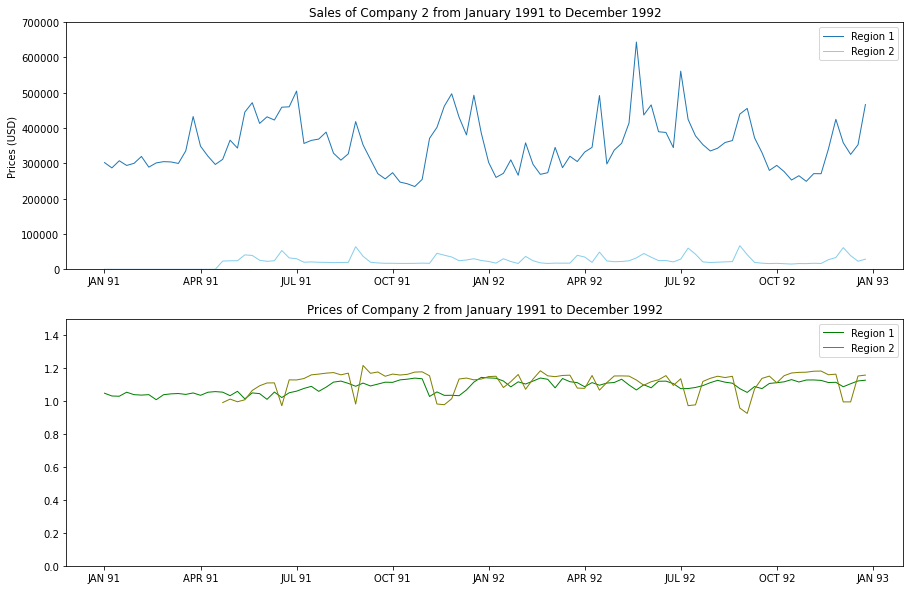

In [7]:
#time series plots with the sales and prices of Company 1

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(15,10))

ax1.plot(r1_c2["Sales_U"],label="Region 1",linewidth=1)
ax1.plot(r2_c2["Sales_U"],label="Region 2", linewidth=1,color = 'skyblue')
ax1.set_xticks(ticks=[0,13,26,39,52,65,78,91,104],labels =["JAN 91","APR 91", "JUL 91","OCT 91","JAN 92","APR 92", "JUL 92","OCT 92","JAN 93"])

ax1.set_ylabel("Sales (lbs)")
ax1.set_title("Sales of Company 2 from January 1991 to December 1992")
ax1.legend(loc="upper right")
ax1.set_ylim(0,700000)

ax2.plot(r1_c2["Price_USD"],label="Region 1" , color ='green',linewidth=1)

ax2.plot(r2_c2["Price_USD"],label="Region 2",linewidth=1 , color ='olive')

ax2.set_xticks(ticks=[0,13,26,39,52,65,78,91,104],labels =["JAN 91","APR 91", "JUL 91","OCT 91","JAN 92","APR 92", "JUL 92","OCT 92","JAN 93"])

ax1.set_ylabel("Prices (USD)")
ax2.set_title("Prices of Company 2 from January 1991 to December 1992")
ax2.legend(loc="upper right")
ax2.set_ylim(0,1.5)

plt.show()

● Construct scatter-plots of sales versus prices for Company 1 in Region 1 and Region 2 separately. Repeat the exercise for Company 2. Is there evidence for a negatively sloped demand-curve in the data? Eye-balling these plots, does demand appear more elastic in Region 1 or 2?

In [8]:
r1_c1.drop(columns="Date", inplace=True)
r1_c1.sort_values('Sales_U',ignore_index=True ,inplace =True)

r2_c1.drop(columns="Date", inplace=True)
r2_c1.dropna(inplace=True)
r2_c1.sort_values('Sales_U',ignore_index=True ,inplace =True)

r1_c2.drop(columns="Date", inplace=True)
r1_c2.sort_values('Sales_U',ignore_index=True ,inplace =True)

r2_c2.drop(columns="Date", inplace=True)
r2_c2.sort_values('Sales_U',ignore_index=True ,inplace =True)
r2_c2.dropna(inplace=True)

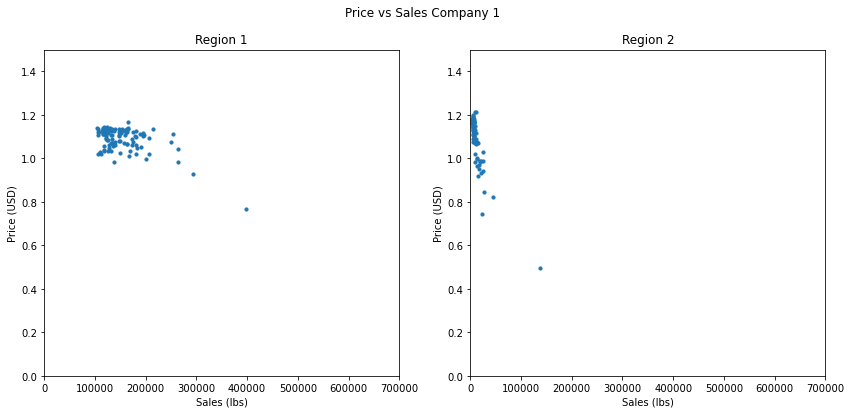

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6) ,sharex=True)
fig.suptitle("Price vs Sales Company 1")

ax1.scatter(r1_c1["Sales_U"],r1_c1["Price_USD"],s=10)
ax1.set_xlim(0,700000)
ax1.set_ylim(0,1.5)
ax1.set_title("Region 1")
ax1.set_xlabel("Sales (lbs)")
ax1.set_ylabel("Price (USD)")

ax2.scatter(r2_c1["Sales_U"],r2_c1["Price_USD"],s=10)
ax2.set_ylim(0,1.5)
ax2.set_title("Region 2")
ax2.set_xlabel("Sales (lbs)")
ax2.set_ylabel("Price (USD)")

plt.show()

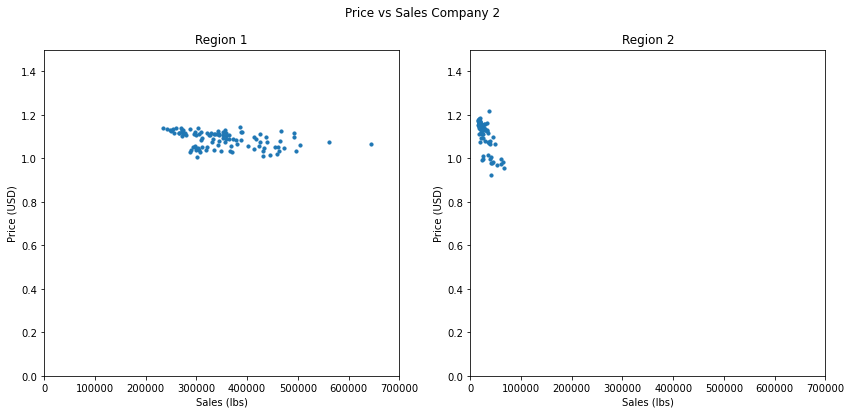

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6),sharex=True)
fig.suptitle("Price vs Sales Company 2")

ax1.scatter(r1_c2["Sales_U"],r1_c2["Price_USD"],s=10)
ax1.set_xlim(0,700000)
ax1.set_ylim(0,1.5)
ax1.set_title("Region 1")
ax1.set_xlabel("Sales (lbs)")
ax1.set_ylabel("Price (USD)")

ax2.scatter(r2_c2["Sales_U"],r2_c2["Price_USD"],s=10)
ax2.set_ylim(0,1.5)
ax2.set_title("Region 2")
ax2.set_xlabel("Sales (lbs)")
ax2.set_ylabel("Price (USD)")

plt.show()

In [11]:
n11 = len(r1_c1["Sales_U"])
r11 = scipy.stats.pearsonr(r1_c1["Sales_U"],r1_c1["Price_USD"])[0]
t11 = r11*math.sqrt((n11-2)/(1-r11**2))
t11

-6.4660716303470664

In [12]:
scipy.stats.t.ppf(.05, n11-2)

-1.6599299759526012

In [13]:
n21 = len(r2_c1["Sales_U"])
r21 = scipy.stats.pearsonr(r2_c1["Sales_U"],r2_c1["Price_USD"])[0]
t21 = r21*math.sqrt((n21-2)/(1-r21**2))
t21

-13.101463400992522

In [14]:
scipy.stats.t.ppf(.05, n21-2)

-1.6627654493673443

In [15]:
n12 = len(r1_c2["Sales_U"])
r12 = scipy.stats.pearsonr(r1_c2["Sales_U"],r1_c2["Price_USD"])[0]
t12 = r12*math.sqrt((n12-2)/(1-r12**2))
t12

-4.058200528786032

In [16]:
scipy.stats.t.ppf(.05, n12-2)

-1.6599299759526012

In [17]:
n22 = len(r2_c2["Sales_U"])
r22=scipy.stats.pearsonr(r2_c2["Sales_U"],r2_c2["Price_USD"])[0]
t22= r11*math.sqrt((n22-2)/(1-r22**2))
t22

-7.754556781432217

In [18]:
scipy.stats.t.ppf(.05, n22-2)

-1.6627654493673443

In both companies the curve of the demand in Region 1 tends to be horizontal, and in Region 2 tends to be vertical. This  behavior suggests that the demand is more elastic in Region 1 than in Region 2.

● Estimate the price elasticity of demand for Company 1 and 2 at Region 1 and 2 (four different demand models). Is the demand elasticity higher (in absolute magnitude) in Region 1 or 2?

In [19]:
m11, b11 = np.polyfit(r1_c1["Sales_U"], r1_c1["Price_USD"], deg=1)
m21, b21 = np.polyfit(r2_c1["Sales_U"], r2_c1["Price_USD"], deg=1)
m12, b12 = np.polyfit(r1_c2["Sales_U"], r1_c2["Price_USD"], deg=1)
m22, b22 = np.polyfit(r2_c2["Sales_U"], r2_c2["Price_USD"], deg=1)

In [20]:
M11, B11 = np.polyfit(np.log(r1_c1["Sales_U"]), np.log(r1_c1["Price_USD"]), deg=1)
M21, B21 = np.polyfit(np.log(r2_c1["Sales_U"]), np.log(r2_c1["Price_USD"]), deg=1)
M12, B12 = np.polyfit(np.log(r1_c2["Sales_U"]), np.log(r1_c2["Price_USD"]), deg=1)
M22, B22 = np.polyfit(np.log(r2_c2["Sales_U"]), np.log(r2_c2["Price_USD"]), deg=1)

In [21]:
points = []
results_values = {
    "name": [],
    "price_elasticity": [],
    "price_mean": [],
    "quantity_mean": [],
    "intercept": [],
    "t_score":[],
    "slope": [],
    "coefficient_pvalue" : [],
}



    #Linear Regression Model
import statsmodels.api as sm
x_value = r1_c1["Sales_U"]
y_value = r1_c1["Price_USD"]
X = sm.add_constant(x_value)
model = sm.OLS(y_value, X)
result = model.fit()
print(result.f_pvalue)    
    
    #(Null Hypothesis test) Coefficient with a p value less than 0.05
if result.f_pvalue < 0.05:
        
    rsquared = result.rsquared
    coefficient_pvalue = result.f_pvalue
    intercept, slope = result.params
    mean_price = np.mean(x_value)
    mean_quantity = np.mean(y_value)
    tintercept, t_score = result.tvalues
     
        #Price elasticity Formula
    price_elasticity = (slope)*(mean_price/mean_quantity)           

3.5198366361804423e-09


In [22]:
data = [["Company 1",1/M11, 1/M21], 
        ["Company 2",1/M12, 1/M22] 
        ]
  
#define header names
col_names = ["","Region 1", "Region 2"]
  
#display table
print(tab(data, headers=col_names))

             Region 1    Region 2
---------  ----------  ----------
Company 1     -9.8838    -5.49479
Company 2    -15.4046    -7.99822


In [23]:
e11  = m11*np.mean(r1_c1["Price_USD"])/np.mean(r1_c1["Sales_U"])
e12  = m11*np.mean(r1_c2["Price_USD"])/np.mean(r1_c2["Sales_U"])
e21  = m11*np.mean(r2_c1["Price_USD"])/np.mean(r2_c1["Sales_U"])
e22  = m22*np.mean(r2_c2["Price_USD"])/np.mean(r2_c2["Sales_U"])

data = [["Company 1",e11, e12], 
        ["Company 2",e21, e22] 
        ]
  
#define header names
col_names = ["","Region 1", "Region 2"]
  
#display table
print(tab(data, headers=col_names))

               Region 1      Region 2
---------  ------------  ------------
Company 1  -4.66831e-12  -2.02591e-12
Company 2  -6.51901e-11  -1.7909e-10


The demand is more elastic at Region 1 in both companies.

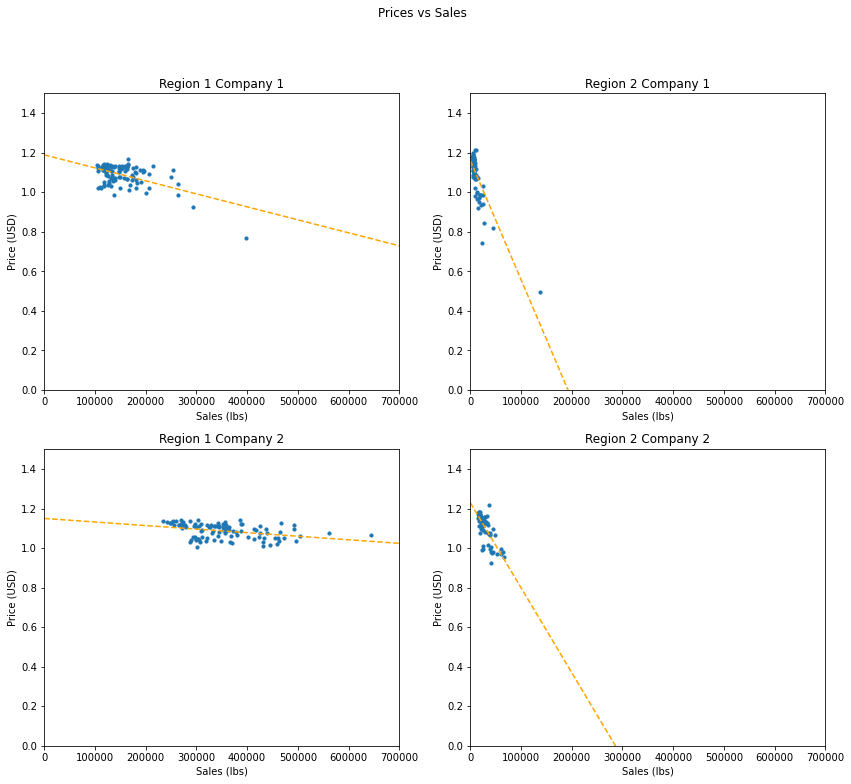

In [24]:
xseq = np.linspace(0, 700000, num=100)

fig, ((ax11, ax21),(ax12,ax22)) = plt.subplots(2, 2,figsize=(14,12))
fig.suptitle("Prices vs Sales")


ax11.scatter(r1_c1["Sales_U"],r1_c1["Price_USD"],s=10)
ax11.plot(xseq, m11 * xseq +b11, color="orange", linestyle="--")

ax11.set_xlim(0,700000)
ax11.set_ylim(0,1.5)

ax11.set_title("Region 1 Company 1")
ax11.set_xlabel("Sales (lbs)")
ax11.set_ylabel("Price (USD)")


ax21.scatter(r2_c1["Sales_U"],r2_c1["Price_USD"],s=10)
ax21.plot(xseq, m21 * xseq +b21, color="orange", linestyle="--")

ax21.set_xlim(0,700000)
ax21.set_ylim(0,1.5)

ax21.set_title("Region 2 Company 1")
ax21.set_xlabel("Sales (lbs)")
ax21.set_ylabel("Price (USD)")


ax12.scatter(r1_c2["Sales_U"],r1_c2["Price_USD"],s=10)
ax12.plot(xseq, m12 * xseq +b12, color="orange", linestyle="--")

ax12.set_xlim(0,700000)
ax12.set_ylim(0,1.5)

ax12.set_title("Region 1 Company 2")
ax12.set_xlabel("Sales (lbs)")
ax12.set_ylabel("Price (USD)")


ax22.scatter(r2_c2["Sales_U"],r2_c2["Price_USD"],s=10)
ax22.plot(xseq, m22 * xseq +b22, color="orange", linestyle="--")

ax22.set_xlim(0,700000)
ax22.set_ylim(0,1.5)

ax22.set_title("Region 2 Company 2")
ax22.set_xlabel("Sales (lbs)")
ax22.set_ylabel("Price (USD)")


plt.show()

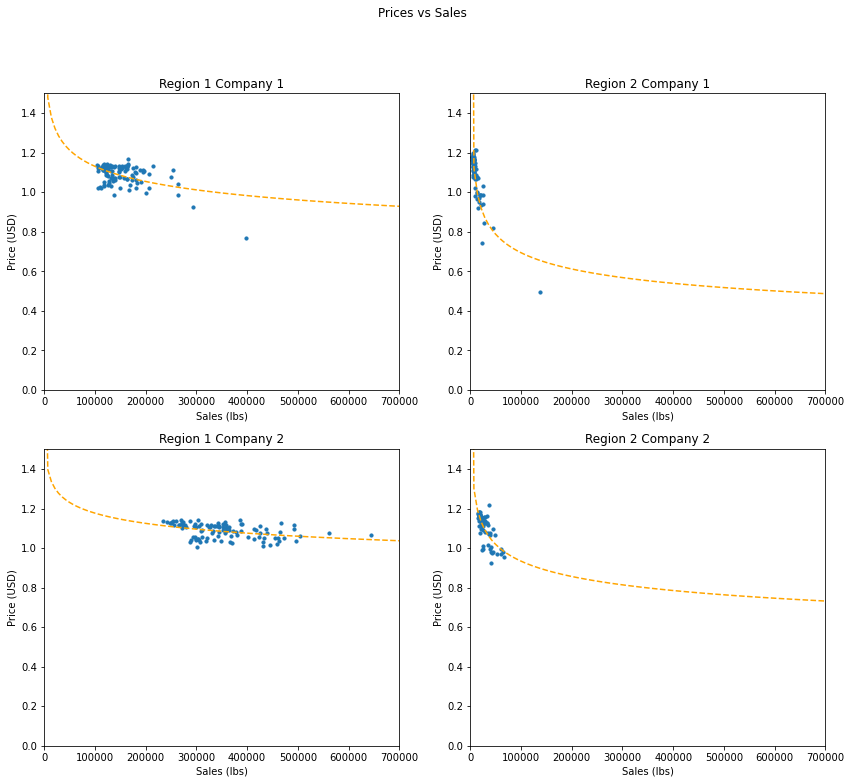

In [25]:
xseq = np.linspace(1, 700000, num=100)

fig, ((ax11, ax21),(ax12,ax22)) = plt.subplots(2, 2,figsize=(14,12))
fig.suptitle("Prices vs Sales")


ax11.scatter(r1_c1["Sales_U"],r1_c1["Price_USD"],s=10)
ax11.plot(xseq, math.exp(B11) * (xseq**M11) , color="orange", linestyle="--")

ax11.set_xlim(0,700000)
ax11.set_ylim(0,1.5)

ax11.set_title("Region 1 Company 1")
ax11.set_xlabel("Sales (lbs)")
ax11.set_ylabel("Price (USD)")


ax21.scatter(r2_c1["Sales_U"],r2_c1["Price_USD"],s=10)
ax21.plot(xseq, math.exp(B21) * (xseq**M21) , color="orange", linestyle="--")

ax21.set_xlim(0,700000)
ax21.set_ylim(0,1.5)

ax21.set_title("Region 2 Company 1")
ax21.set_xlabel("Sales (lbs)")
ax21.set_ylabel("Price (USD)")


ax12.scatter(r1_c2["Sales_U"],r1_c2["Price_USD"],s=10)
ax12.plot(xseq, math.exp(B12) * (xseq**M12) , color="orange", linestyle="--")

ax12.set_xlim(0,700000)
ax12.set_ylim(0,1.5)

ax12.set_title("Region 1 Company 2")
ax12.set_xlabel("Sales (lbs)")
ax12.set_ylabel("Price (USD)")


ax22.scatter(r2_c2["Sales_U"],r2_c2["Price_USD"],s=10)
ax22.plot(xseq, math.exp(B22) * (xseq**M22) , color="orange", linestyle="--")

ax22.set_xlim(0,700000)
ax22.set_ylim(0,1.5)

ax22.set_title("Region 2 Company 2")
ax22.set_xlabel("Sales (lbs)")
ax22.set_ylabel("Price (USD)")


plt.show()

● While making a crucial presentation of the above results in front of your team, your analyst colleague questions your results as follows: "This is all fine. But,you know, you're missing a lot of variables in your so-called regression model. For instance, the sales of Company 1 at Region 2 are clearly affected by store traffic. When it snows, less people visit Region 2, and youdon't have suchfactors -- the weather, temperature, traffic congestions, etc. So aren't yourcross-price effects all wrong?" Is your colleague right or wrong?

In [26]:
import statsmodels.api as sm

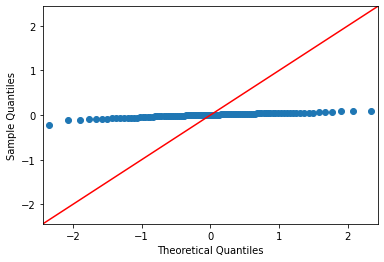

In [27]:
r1_c1["Pred_Price_USD"]=math.exp(B11) * (r1_c1["Sales_U"]**M11)
r1_c1["Residual_Price_USD"] = r1_c1["Price_USD"]-r1_c1["Pred_Price_USD"]

sm.qqplot(r1_c1["Residual_Price_USD"], line='45')
plt.show()

In [28]:
r1_c1["Residual_Price_USD"].describe()

count    104.000000
mean       0.001147
std        0.048859
min       -0.214905
25%       -0.022691
50%        0.008527
75%        0.035520
max        0.090598
Name: Residual_Price_USD, dtype: float64

In [29]:
scipy.stats.shapiro(r1_c1["Residual_Price_USD"])

ShapiroResult(statistic=0.9373615980148315, pvalue=9.730234887683764e-05)

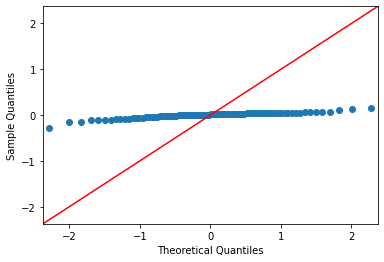

In [30]:
r2_c1["Pred_Price_USD"]=m21*r2_c1["Sales_U"]+b21
r2_c1["Residual_Price_USD"] = r2_c1["Price_USD"]-r2_c1["Pred_Price_USD"]

sm.qqplot(r2_c1["Residual_Price_USD"], line='45')
plt.show()

In [31]:
scipy.stats.shapiro(r2_c1["Residual_Price_USD"])

ShapiroResult(statistic=0.9064970016479492, pvalue=9.854413292487152e-06)